In [1]:
#Побудувати попередньо навчену модель VGG16 (або VGG19, Resnet та інші).
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications import VGG16
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.metrics import classification_report, confusion_matrix

(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [3]:
#Зробити тонке налаштування (заморозити частину шарів, додати зверху шари).
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=2, min_lr=1e-6)


batch_size = 64
epochs = 30

history = model.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[early_stopping, reduce_lr])

Epoch 1/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.4028 - loss: 1.6983 - val_accuracy: 0.5398 - val_loss: 1.2973 - learning_rate: 0.0010
Epoch 2/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.5424 - loss: 1.3156 - val_accuracy: 0.5623 - val_loss: 1.2347 - learning_rate: 0.0010
Epoch 3/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.5617 - loss: 1.2518 - val_accuracy: 0.5842 - val_loss: 1.1914 - learning_rate: 0.0010
Epoch 4/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5749 - loss: 1.2133 - val_accuracy: 0.5881 - val_loss: 1.1801 - learning_rate: 0.0010
Epoch 5/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5860 - loss: 1.1867 - val_accuracy: 0.5925 - val_loss: 1.1539 - learning_rate: 0.0010
Epoch 6/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.5930 - loss: 1.1590 - val_accuracy: 0.5995 - val_loss: 1.1415 - learning_rate: 0.0010
Epoch 7/30
782/782 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.5969 - los

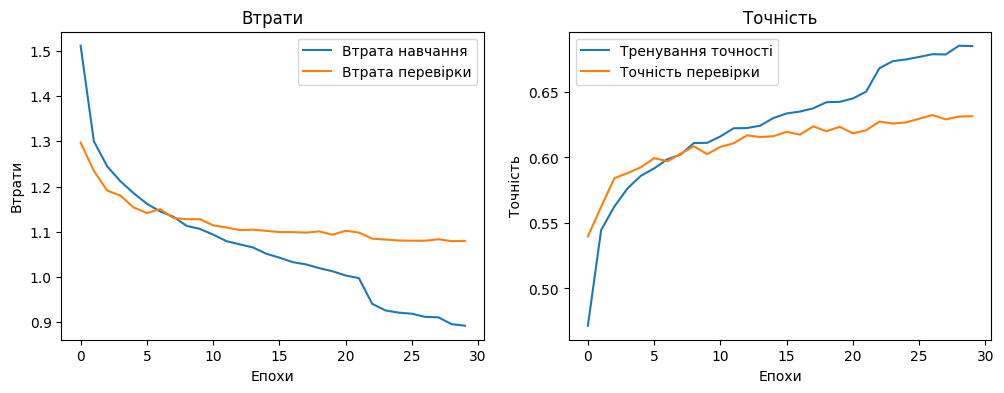

In [4]:
def plot_training_history(history):
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Втрата навчання')
    plt.plot(history.history['val_loss'], label='Втрата перевірки')
    plt.title('Втрати')
    plt.xlabel('Епохи')
    plt.ylabel('Втрати')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Тренування точності')
    plt.plot(history.history['val_accuracy'], label='Точність перевірки')
    plt.title('Точність')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()

    plt.show()

plot_training_history(history)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step
              precision    recall  f1-score   support

           0       0.71      0.72      0.72      1000
           1       0.67      0.71      0.69      1000
           2       0.59      0.51      0.54      1000
           3       0.46      0.44      0.45      1000
           4       0.58      0.57      0.58      1000
           5       0.58      0.55      0.56      1000
           6       0.62      0.71      0.66      1000
           7       0.69      0.70      0.70      1000
           8       0.75      0.76      0.75      1000
           9       0.64      0.65      0.65      1000

    accuracy                           0.63     10000
   macro avg       0.63      0.63      0.63     10000
weighted avg       0.63      0.63      0.63     10000



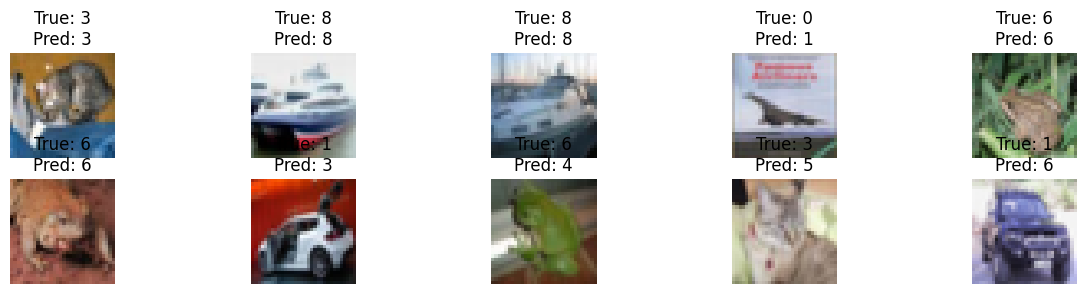

In [5]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print(classification_report(y_true, y_pred_classes))

def visualize_predictions(images, true_labels, pred_labels, num=10):
    plt.figure(figsize=(15, 3))
    for i in range(num):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(f'True: {true_labels[i]}\nPred: {pred_labels[i]}')
        plt.axis('off')
    plt.show()

visualize_predictions(x_test, y_true, y_pred_classes)

In [7]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 1, 1, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,116,384 (57.66 MB)

 Trainable params: 133,898 (523.04 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

 Optimizer params: 267,798 (1.02 MB)

In [ ]:
#Висновок: У цій лабораторній роботі було реалізовано використання попередньо натренованої моделі VGG16 для класифікації зображень з датасету CIFAR-10.

#Попередня обробка даних:Завантаження та нормалізація зображень CIFAR-10. Перетворення зображень у формат, який підтримує модель VGG16 (розмір 32x32 пікселя, 3 канали).
#Налаштування моделі: Використано модель VGG16 без верхніх шарів (без повнозв'язних шарів), щоб використовувати її як базову для екстракції ознак.
#Заморожено перші шари моделі для запобігання перенавчанню та прискорення навчання.
#Додано шари для класифікації, включаючи шар глобального середнього пулінгу, повнозв'язний шар з 256 нейронами та вихідний шар з 10 нейронів для класифікації 10 класів.
#Тренування та оцінка моделі: Модель була навчена з використанням оптимізатора Adam і функції втрат sparse categorical crossentropy.
#Після навчання було оцінено тестову точність моделі, яка показала загальний результат.
#Візуалізація результатів: Для оцінки ефективності навчання були побудовані графіки точності та втрат.
#Результати навчання показали високий рівень точності на тестовому наборі даних після тонкого налаштування моделі, що підтверджує ефективність використання попередньо натренованих моделей та трансферного навчання для класифікації зображень.
#Отримані графіки демонструють стабільне зростання точності на тренувальних та валідаційних даних, а також зниження втрат на цих етапах.

#Таким чином, використання трансферного навчання з VGG16 дозволило досягти високих результатів при класифікації зображень CIFAR-10 навіть при порівняно обмежених ресурсах для навчання.
#Цей підхід є ефективним для розв'язання задачі класифікації зображень без необхідності тренувати модель з нуля.